In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.utils.slope_and_trend import _slope
import pandas as pd
import glob

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#CSV読み込み；全データをデータフレームのまとめる
path = '.\\dataset'

all_files = glob.glob(path + "\\**\\*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None,usecols=[2])
    li.append(df)

X_df = pd.concat(li, axis=1, ignore_index=True)
X_df = X_df.T
Y_df =np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

In [3]:
print("X Y shape = " + str(X_df.shape[0]) + " " + str(len(Y_df)))

X Y shape = 20 20


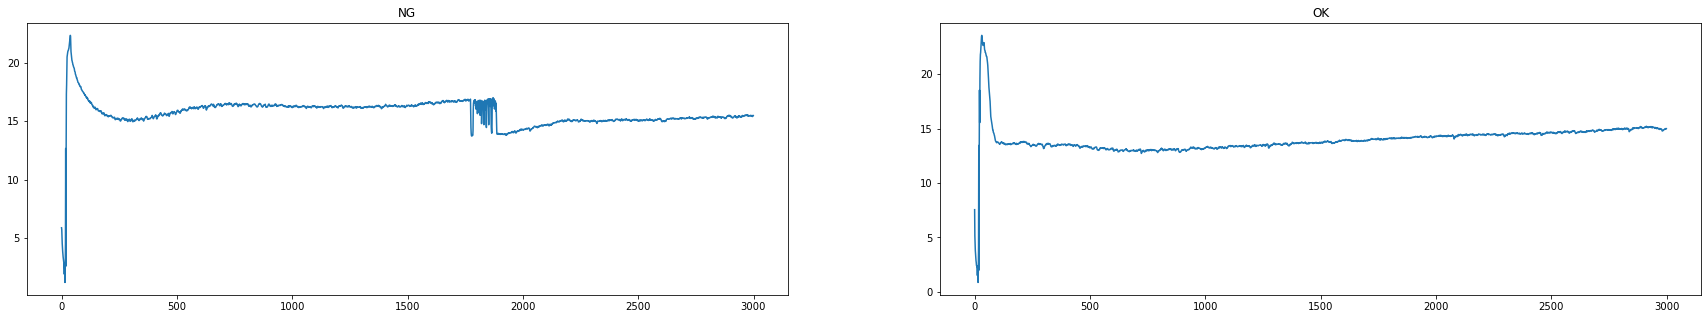

In [4]:
##MATPLOTLIB
fig = plt.figure(figsize=[30,5])
fig.add_subplot(1, 2, 1)
plt.title("NG")
plt.plot(X_df.T[0])

fig.add_subplot(1, 2, 2)
plt.title("OK")
plt.plot(X_df.T[12])

In [5]:
##PLOTLY
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=X_df.T[0]),row=1, col=1)
fig.add_trace(go.Scatter(y=X_df.T[11]),row=1, col=2)

fig.update_layout(height=500, width=1000, showlegend=False)
fig.show()

In [6]:
from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor

steps = [
    (
        "extract",
        RandomIntervalFeatureExtractor(
            n_intervals="sqrt", features=[np.mean, np.std, _slope]
        ),
    ),
    ("clf", DecisionTreeClassifier()),
]
time_series_tree = Pipeline(steps)

In [7]:
from sktime.utils.data_processing import from_2d_array_to_nested
X_df_tab = from_2d_array_to_nested(X_df)


X_df_tab.head()

,0
0,0 5.877780 1 5.724780 2 5...
1,0 4.649640 1 4.571072 2 4...
2,0 0.675758 1 0.646812 2 0...
3,0 -0.097515 1 -0.118191 2 -0...
4,0 -8.016331 1 -7.974979 2 -7...


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_df_tab, Y_df)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15, 1) (15,) (5, 1) (5,)


In [17]:
time_series_tree.fit(X_train, y_train)
time_series_tree.score(X_test, y_test)

1.0